# CMBr TT Least Square Fit
### Homework 6 - Umur Can Kaya - 090140107

I want to fit a function to CMBr TT autocorrelation data by using least squares method. But since TT power spectrum is highly non-linear, it is hard to do a fit by using least squares method. Therefore I fit a polynomial of degree $n$ to the data. I change the $n$ from 1 to 30 and perform a fit at each $n$. Then I calculate the $\chi^2$ in order obtain the goodness of fit. Arter I determine the $n$ which gives the lowest $\chi^2$, I plot the fitted function, data and theoretical prediction on top of each other.

The result is my data can not be fitted by a polynomial.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the data files of theory and experiment

In [2]:
theory_fname = 'COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'
planck_fname = 'COM_PowerSpect_CMB-TT-full_R3.01.txt'
theory = pd.read_fwf(theory_fname).drop(columns=['#'])
planck = pd.read_fwf(planck_fname).drop(columns=['#'])
calPlanck = 0.1000442E+01

```calPlanck``` is the best-fit Planck map-based calibration parameter, it is manually copied from another data file.

In [3]:
theory['TT'] /= calPlanck**2
theory['L'] = planck['l']
theory.head()

,L,TT,TE,EE,BB,PP
0,2.0,1015.831806,2.61753,0.030883,0.000002,5.013520e-08
1,3.0,962.875630,2.93806,0.039690,0.000004,6.099430e-08
2,4.0,911.801789,2.75866,0.034496,0.000006,7.025920e-08
3,5.0,873.704475,2.35185,0.023094,0.000009,7.829210e-08
4,6.0,847.759415,1.89605,0.012951,0.000013,8.530200e-08


In [4]:
planck.head()

,l,Dl,-dDl,+dDl
0,2.0,225.895,132.369,533.062
1,3.0,936.920,450.471,1212.308
2,4.0,692.238,294.111,666.469
3,5.0,1501.705,574.432,1155.804
4,6.0,557.611,201.242,375.763


Here, ```theory['TT']``` is the theoretical prediction of temperature power spectrum ($D_{\ell}^{TT}$) and ```planck['Dl']``` is the experimental value of $D_{\ell}^{TT}$.

```planck[['-dDl','+dDl']]``` corresponds to upward and downward uncertainties of $D_{\ell}^{TT}$.

## Plotting data

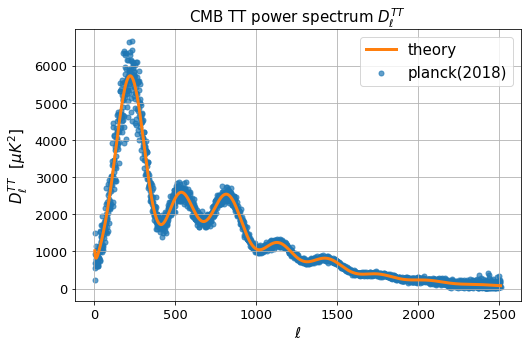

In [5]:
fig, ax = plt.subplots(figsize=(8*1.,5*1.))
fs = 15

ax.scatter(planck['l'],planck['Dl'],label='planck(2018)',alpha=0.7,color='C0',s=25)
ax.plot(planck['l'],theory['TT'],lw=3,label='theory',color='C1',alpha=1)

ax.set_xlabel('${\ell}$', fontsize=fs)
ax.set_ylabel(r'$D_{\ell}^{TT}\ \ [\mu K^2]$', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)

ax.grid(True)

ax.set_title('CMB TT power spectrum $D_{\ell}^{TT}$', fontsize=fs)

ax.legend(loc='best', fontsize=fs)

#fig.savefig('TT_power_spectrum.pdf',tight_layout=True)

In [82]:
def goodness_of_fit(y,yfit):
    alpha = np.std(y)
    chi2 = sum(((y-yfit)/alpha)**2)
    return chi2

In [107]:
degrees = np.arange(1,31)
fits = []
chi2 = []

for deg in degrees:
    coefs = np.polyfit(planck['l'], planck['Dl'], deg)
    Dl_fit = np.polyval(coefs,planck['l'])
    fits.append(Dl_fit)
    chi2.append(goodness_of_fit(planck['Dl'],Dl_fit))

/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned
/home/umurcankaya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit ma

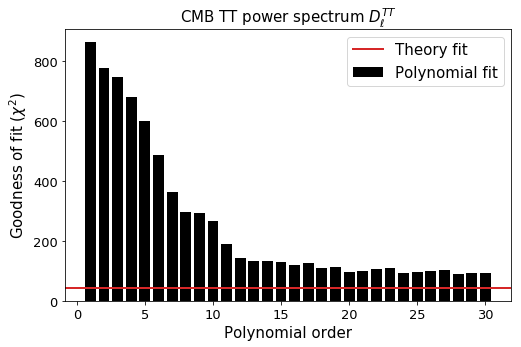

In [115]:
fig, ax = plt.subplots(figsize=(8*1.,5*1.))
fs = 15

ax.bar(degrees,chi2, color='k', label='Polynomial fit')

ax.axhline(goodness_of_fit(planck['Dl'],theory['TT']), label='Theory fit', lw=2, color='C3')

ax.set_xlabel('Polynomial order', fontsize=fs)
ax.set_ylabel(r'Goodness of fit ($\chi^2$)', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)

ax.set_title('CMB TT power spectrum $D_{\ell}^{TT}$', fontsize=fs)

ax.legend(loc='best', fontsize=fs)

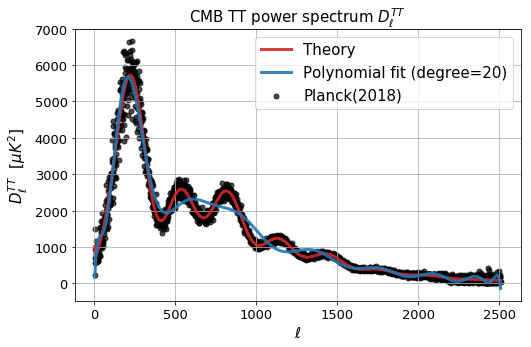

In [112]:
fig, ax = plt.subplots(figsize=(8*1.,5*1.))
fs = 15

ax.scatter(planck['l'],planck['Dl'],label='Planck(2018)',alpha=0.7,color='k',s=25)
ax.plot(planck['l'],theory['TT'],lw=3,label='Theory',color='C3',alpha=0.9)
ax.plot(planck['l'],fits[19],lw=3,label='Polynomial fit (degree=20)',color='C0',alpha=0.9)

ax.set_xlabel('${\ell}$', fontsize=fs)
ax.set_ylabel(r'$D_{\ell}^{TT}\ \ [\mu K^2]$', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)

ax.grid(True)

ax.set_title('CMB TT power spectrum $D_{\ell}^{TT}$', fontsize=fs)

ax.legend(loc='best', fontsize=fs)

## References
- http://pla.esac.esa.int/pla/#cosmology
- https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/CMB_spectrum_%26_Likelihood_Code#TT